In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
minimal_font_size = 15
plt.rcParams['font.size'] = minimal_font_size
axisfont = {'family': 'Times New Roman', 'weight': 'bold', 'size': 18}
tickfont = {'labelfontfamily': 'Times New Roman', 'labelsize': minimal_font_size}
legendfont = {'family': 'Times New Roman', 'weight': 'normal', 'size': minimal_font_size}

In [ ]:
pareto_data = pd.read_csv("outputs/2025-10-17 23-53-02/pareto_data.csv")
pareto_data.head()

In [ ]:
no_control_ttt = 38079.6759227694
no_control_ttf = 179131.53562351898
pareto_data["dec_ttt"] = no_control_ttt - pareto_data["ttt"]
pareto_data["dec_ttt_percent"] = pareto_data["dec_ttt"] / no_control_ttt * 100
pareto_data["dec_ttt_percent"] = pareto_data["dec_ttt_percent"].round(2)
pareto_data["dec_ttr"] = pareto_data["ttf"] - no_control_ttf
pareto_data["dec_ttr_percent"] = pareto_data["dec_ttr"] / no_control_ttf * 100
pareto_data["dec_ttr_percent"] = pareto_data["dec_ttr_percent"].round(2)
pareto_data.head()

In [ ]:
pareto_data.tail()

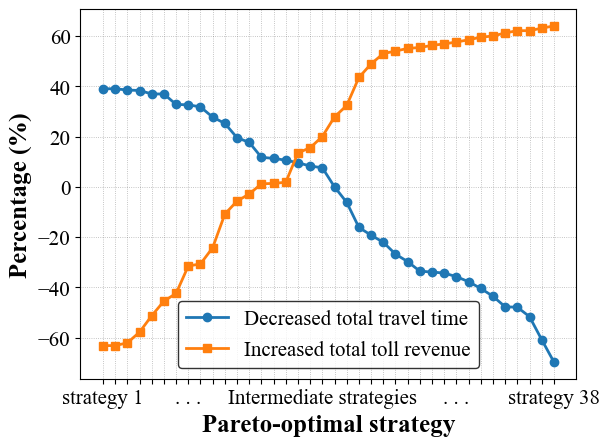

In [ ]:
# plt.figure(figsize=(9, 6))
# plt.figure(figsize=(9, 6.75))
x = [str(i) for i in range(1, pareto_data.shape[0] + 1)]
plt.plot(x, pareto_data["dec_ttt_percent"], label="Decreased total travel time",
         # Percentage of decreased total travel time
         marker='o', linewidth=2)
plt.plot(x, pareto_data["dec_ttr_percent"],
         label="Increased total toll revenue", marker='s', linewidth=2)  # Percentage of increased total toll revenue

plt.xlabel('Pareto-optimal strategy', axisfont)
plt.ylabel('Percentage (%)', axisfont)
plt.tick_params(axis='both', which='both', **tickfont)
# plt.xticks(list(range(38)), labels=["strategy 1"] + ["" for _ in range(36)] + ["strategy 38"])
plt.xticks(list(range(38)), labels=["strategy 1"] +
                                   ["" for _ in range(6)]+[". . ."] +["" for _ in range(10)]
                                   +["Intermediate strategies"]+
                                   ["" for _ in range(10)]+[". . ."] +["" for _ in range(7)]+
                                   ["strategy 38"])
# plt.xticks(fontsize=8.5)
plt.grid(ls=':', alpha=0.3, lw=0.6, color='k')
plt.legend(loc="best", edgecolor='k', prop=legendfont)
plt.savefig("percentage_change.png", bbox_inches='tight', dpi=600)
plt.show()